In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
agn_dataframe = pd.read_csv('adjusted_agn_dataframe.csv')

In [3]:
flag = [float('inf')]

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats.
# Takes an optional string char for the characters to split by
def convert_to_float_list(str_list, **kwargs):
    char = kwargs.get('char', None)
    debug = kwargs.get('debug', False)
    
    if debug:
        print(str_list + ' foo')
        
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    if debug:
        print(str_list + ' bar')
    
    try:
        return [float(i) for i in str_list.split(char)]
    except ValueError:
        return flag

### Light curve of 0.22032 -7.1532 ZTFG

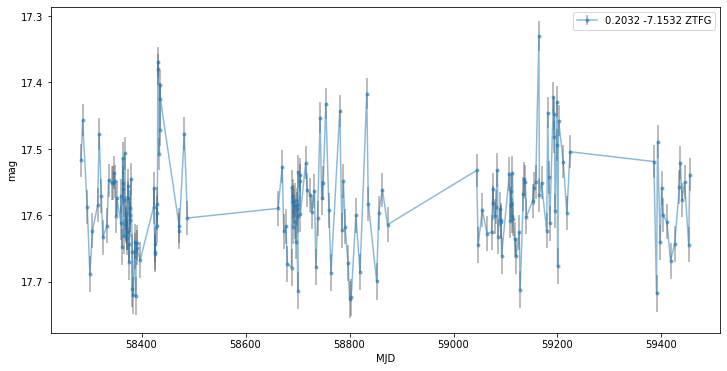

In [4]:
agn_example = pd.read_csv('../../AGN_LightCurves/0.2032_-7.1532_ztfg.parquet')
plt.figure(figsize=[12,6])
plt.errorbar(agn_example['mjd'], agn_example['mag'], yerr=agn_example['magerr'], 
             linestyle='solid', marker='.', alpha=0.5, ecolor='0.3', label='0.2032 -7.1532 ZTFG')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### Light curve of 1.0082 70.3217 ZTFG

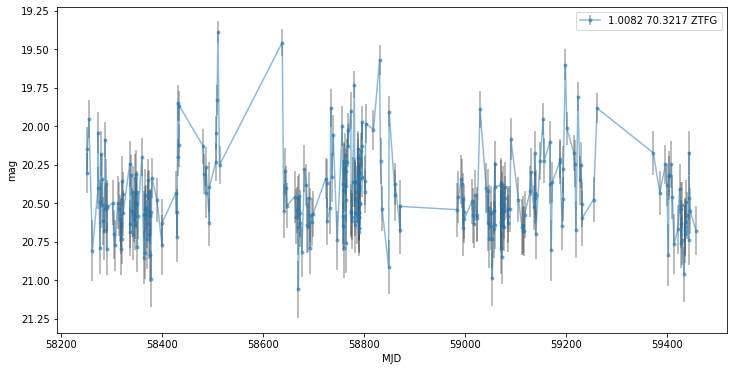

In [5]:
agn_example = pd.read_csv('../../AGN_LightCurves/1.0082_70.3217_ztfg.parquet')
plt.figure(figsize=[12,6])
plt.errorbar(agn_example['mjd'], agn_example['mag'], yerr=agn_example['magerr'], 
             linestyle='solid', marker='.', alpha=0.5, ecolor='0.3', label='1.0082 70.3217 ZTFG')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### SNR, LC Length, and log Lbol

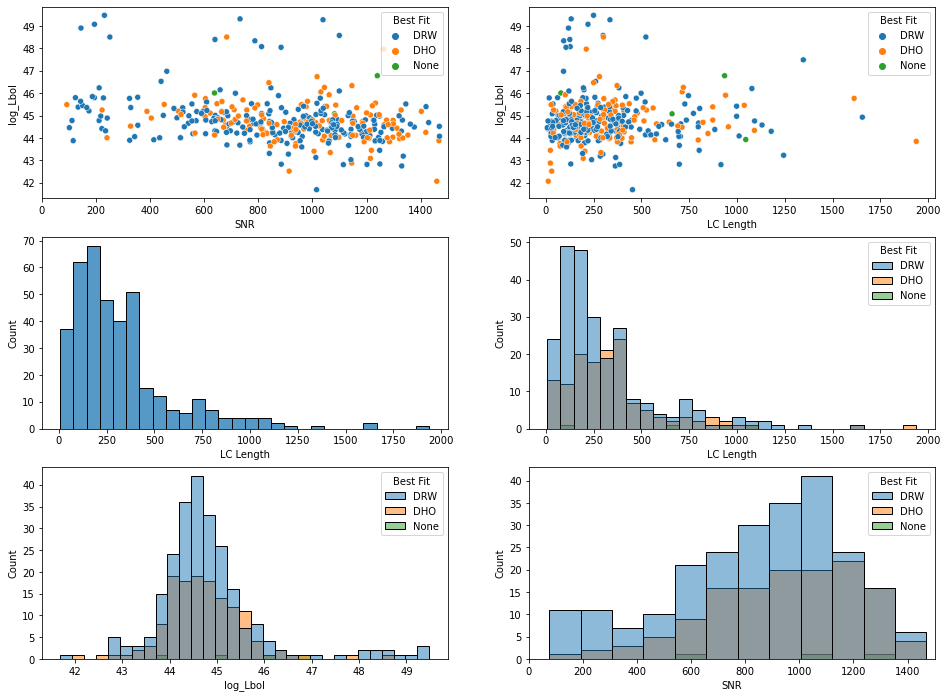

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

row = 0
# SNR vs log LBol
sns.scatterplot(data=agn_dataframe, x='SNR', y ='log_Lbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# LC Length vs log LBol
sns.scatterplot(data=agn_dataframe, x='LC Length', y ='log_Lbol', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of LC Length
sns.histplot(data=agn_dataframe, x='LC Length', ax=axs[row,0])
# histogram of LC Length for best fit
sns.histplot(data=agn_dataframe, x='LC Length', hue='Best Fit', ax=axs[row,1])

row += 1
# histogram of log LBol for best fit
sns.histplot(data=agn_dataframe, x='log_Lbol', hue='Best Fit', ax=axs[row,0])
# histogram of SNR for best fit
sns.histplot(data=agn_dataframe, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 

plt.show()

### DRW tau and amp

In [4]:
best_fits = []
taus = []
amps = []
Lbols = []

for index, row in agn_dataframe.iterrows():
    best_fit= row['Best Fit']
    DRW_term = convert_to_float_list(row['Best DRW ARMA Fit'])
    Lbol = row['log_Lbol']
    
    taus.append(DRW_term[0])
    amps.append(DRW_term[1])
    Lbols.append(Lbol)

drw_data = pd.DataFrame({'tau': taus, 'amp': amps, 'log_Lbol': Lbols})

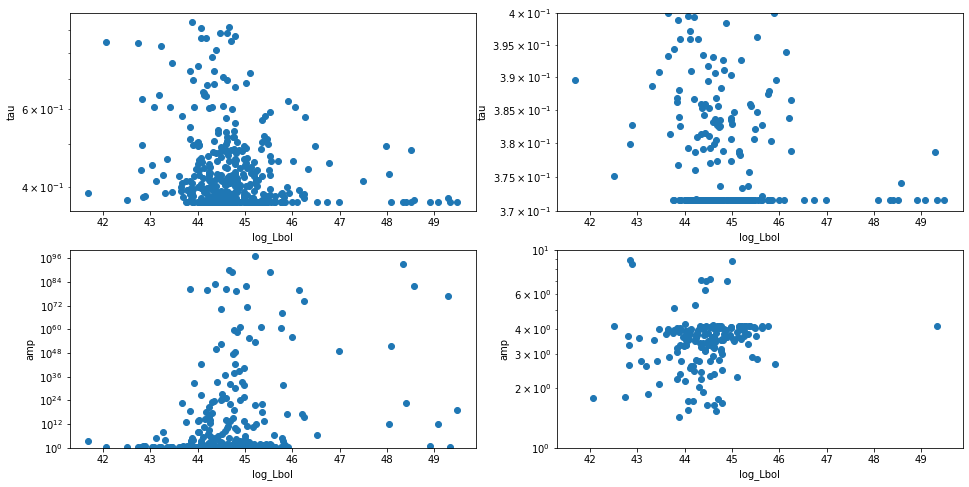

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

row = 0
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 0
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='tau')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(3.7e-1,4e-1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('tau')

row = 1
col = 0
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e100)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

row = 1
col = 1
axs[row, col].scatter(data=drw_data, x='log_Lbol', y ='amp')
axs[row, col].set_yscale('log')
axs[row, col].set_ylim(1, 1e1)
axs[row, col].set_xlabel('log_Lbol')
axs[row, col].set_ylabel('amp')

plt.show()

### DHO Timescales

In [4]:
# exclude fits for which DHO_chi_sq is infinity
agn_dataframe = agn_dataframe[agn_dataframe['DHO_chi_sq'] != np.inf]

#### log_Lbol vs timescales

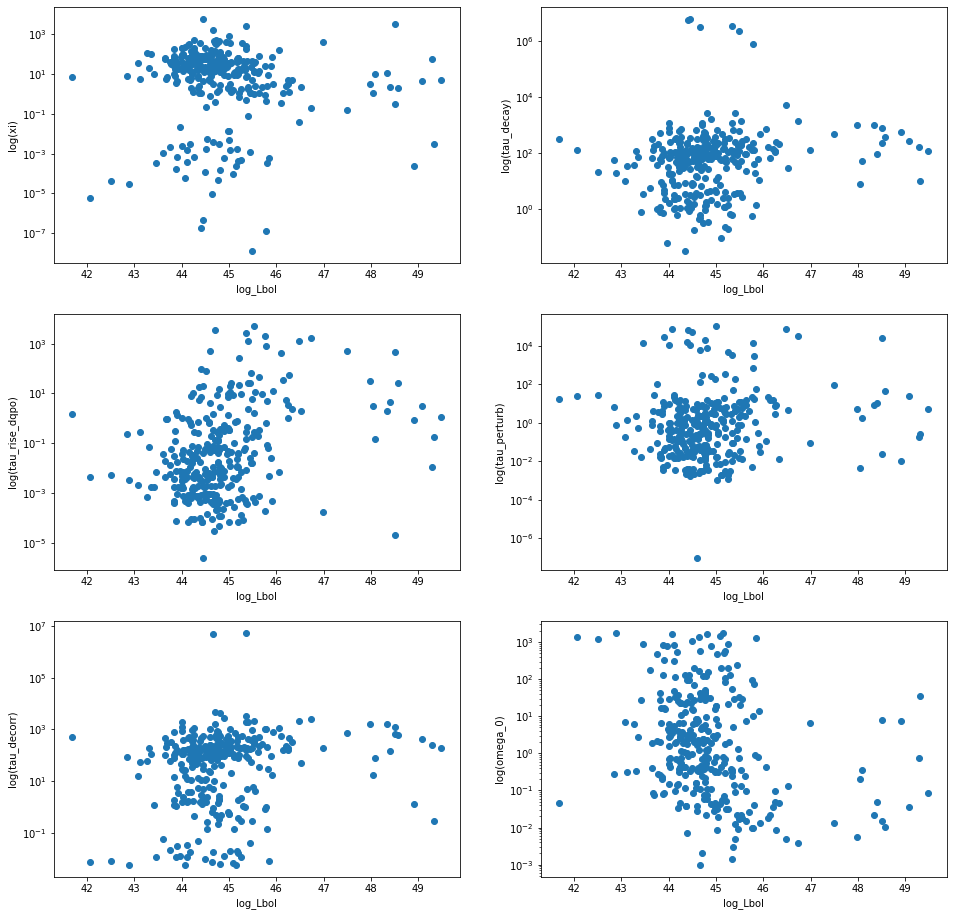

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Lbol'

# xi
row = 0
col = 0
sc = axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='xi')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decay')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_perturb')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decorr')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='omega_0')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig('timescales_Lbol.png')

#### log_Mbh vs timescales

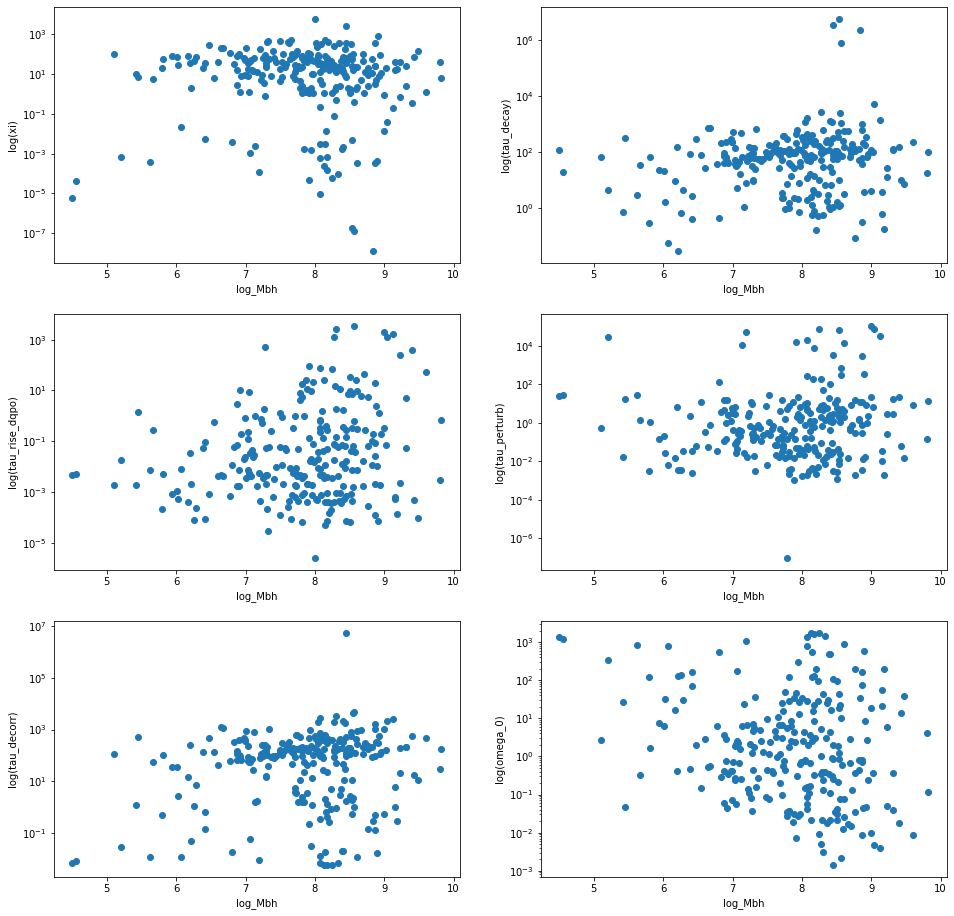

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
x_ax = 'log_Mbh'

# xi
row = 0
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='xi')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(xi)')

# tau_decay
row = 0
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decay')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decay)')

# tau_rise_dqpo
row = 1
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_rise_dqpo')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_rise_dqpo)')

# tau_perturb
row = 1
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_perturb')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_perturb)')

# tau_decorr
row = 2
col = 0
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='tau_decorr')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(tau_decorr)')

# omega_0
row = 2
col = 1
axs[row, col].scatter(data=agn_dataframe, x=x_ax, y='omega_0')
axs[row, col].set_yscale('log')
axs[row, col].set_xlabel(x_ax)
axs[row, col].set_ylabel('log(omega_0)')

plt.savefig('timescales_Mbh.png')

#### Colorbar

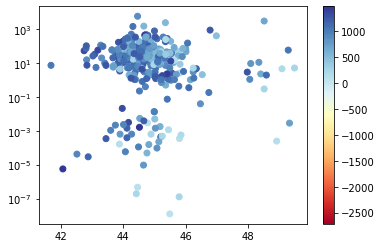

In [7]:
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(data=agn_dataframe, x='log_Lbol', y='xi', c='SNR', cmap=cm)
plt.colorbar(sc)
plt.yscale('log')
plt.show()

#### Timescales vs log_Lbol and DHO Terms

In [5]:
bat_ids = []
log_Lbols = []
a1s = []
a2s = [] 
b0s = []
b1s = []
xis = []
tau_decays = []
tau_rise_dqpos = []
tau_perturbs = []
tau_decorrs = []
omega_0s = []

for index, row in agn_dataframe.iterrows():
    bat_ids.append(row['BAT ID'])
    log_Lbols.append(row['log_Lbol'])

    dho_terms = convert_to_float_list(row['DHO MCMC Fit'])
    bounds = [15, 15, 10, 10]
    
    # if dho_term > bound (same bound as in pp) then use the bound
    a1s.append(dho_terms[0] if dho_terms[0] < bounds[0] else bounds[0])
    a2s.append(dho_terms[1] if dho_terms[1] < bounds[1] else bounds[1])
    b0s.append(dho_terms[2] if dho_terms[2] < bounds[2] else bounds[2])
    b1s.append(dho_terms[3] if dho_terms[3] < bounds[3] else bounds[3])
    
    xis.append(row['xi'])
    tau_decays.append(row['tau_decay'])
    tau_rise_dqpos.append(row['tau_rise_dqpo'])
    tau_perturbs.append(row['tau_perturb'])
    tau_decorrs.append(row['tau_decorr'])
    omega_0s.append(row['omega_0'])
    
dho_fit_data = pd.DataFrame({'BAT ID': bat_ids, 'log_Lbol': log_Lbols,
                                 'a1': a1s, 'a2': a2s, 'b0': b0s, 'b1': b1s,
                                 'xi': xis, 
                                 'tau_decay': tau_decays, 'tau_rise_dqpo': tau_rise_dqpos, 'tau_perturb': tau_perturbs, 'tau_decorr': tau_decorrs, 
                                 'omega_0': omega_0s})
dho_fit_data

,BAT ID,log_Lbol,a1,a2,b0,b1,xi,tau_decay,tau_rise_dqpo,tau_perturb,tau_decorr,omega_0
0,1,44.53,0.742693,15.000000,10.000000,1.032423e+00,0.005435,2.692902,0.091962,3.283483e-02,0.144449,68.326007
1,4,44.58,15.000000,15.000000,10.000000,1.000000e+01,63.743687,14.956146,0.000920,2.361631e-01,23.494505,8.523555
2,5,45.38,2.301411,0.019597,0.231441,1.658943e+00,8.219890,116.998949,0.436136,7.167888e+00,184.466599,0.139990
3,6,44.80,15.000000,0.188485,3.276205,9.915132e-01,21.282623,97.989004,0.054144,3.026407e-01,154.005815,0.434148
4,28,44.63,5.198760,0.118977,0.967640,2.530884e+00,7.535967,43.502442,0.193208,2.615524e+00,68.636966,0.344930
...,...,...,...,...,...,...,...,...,...,...,...,...
308,24,44.35,15.000000,15.000000,10.000000,1.000000e+01,36.513515,3.420047,0.000642,5.041347e-02,5.373204,21.348637
309,316,44.60,0.239573,0.000754,0.018741,1.741356e-09,4.360995,313.305699,4.230454,9.291800e-08,498.784621,0.027468
310,317,44.01,15.000000,7.334812,10.000000,1.000000e+01,93.848543,69.302788,0.001967,1.007317e+00,108.863656,2.708286
311,318,44.77,7.690914,0.029642,0.666959,8.268291e-01,22.335593,259.333867,0.130089,1.239701e+00,407.565028,0.172167


In [6]:
def color_plot(dataframe, x_ax, c_ax, name=''):
    fig, axs = plt.subplots(3, 2, figsize=(16, 16))
    cm = plt.cm.get_cmap('RdYlBu')

    # xi
    row = 0
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='xi', c=c_ax, cmap=cm)
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(xi)')

    # tau_decay
    row = 0
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decay', c=c_ax, cmap=cm)
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decay)')

    # tau_rise_dqpo
    row = 1
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_rise_dqpo', c=c_ax, cmap=cm)
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_rise_dqpo)')

    # tau_perturb
    row = 1
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_perturb', c=c_ax, cmap=cm)
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_perturb)')

    # tau_decorr
    row = 2
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decorr', c=c_ax, cmap=cm)
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decorr)')

    # omega_0
    row = 2
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='omega_0', c=c_ax, cmap=cm)
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(omega_0)')
    
    plt.show
    
    if name != '':
        plt.savefig(f'{name}.png')

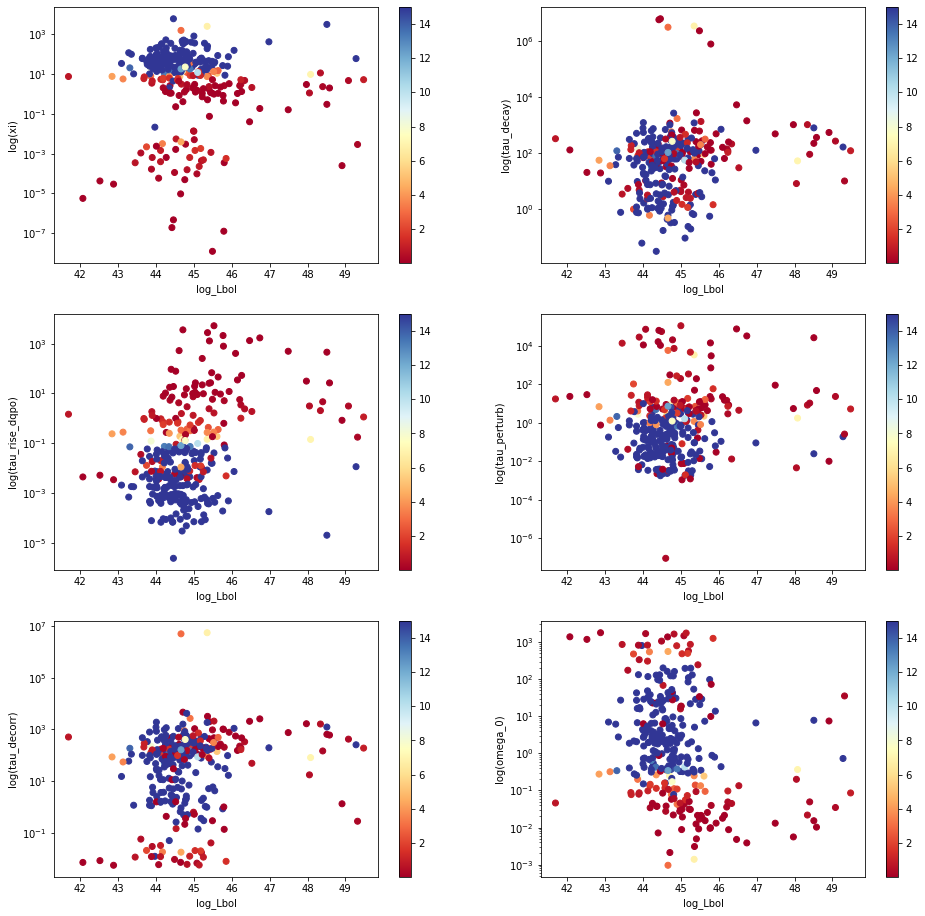

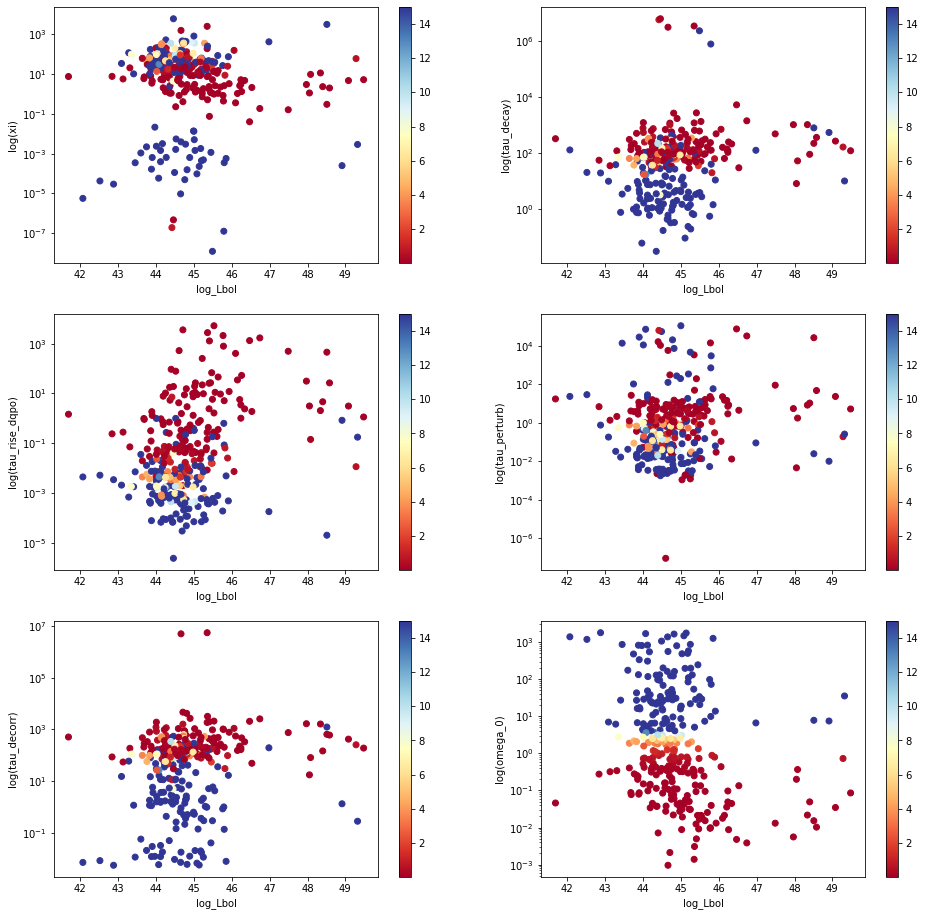

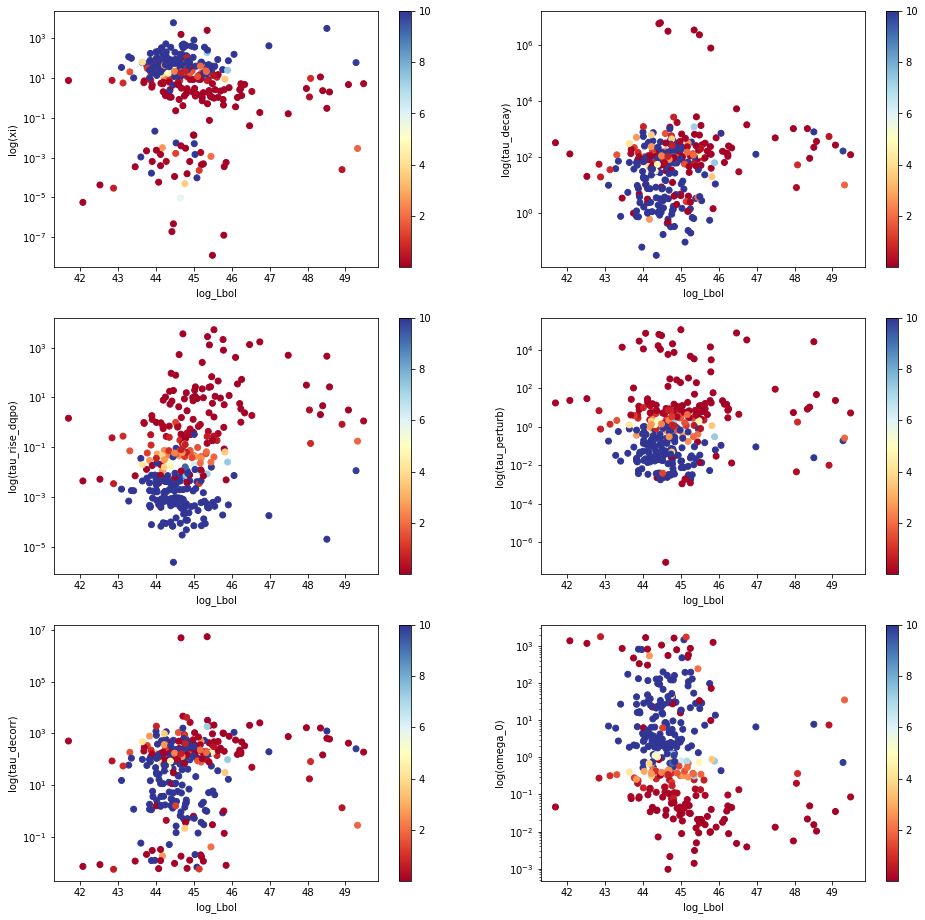

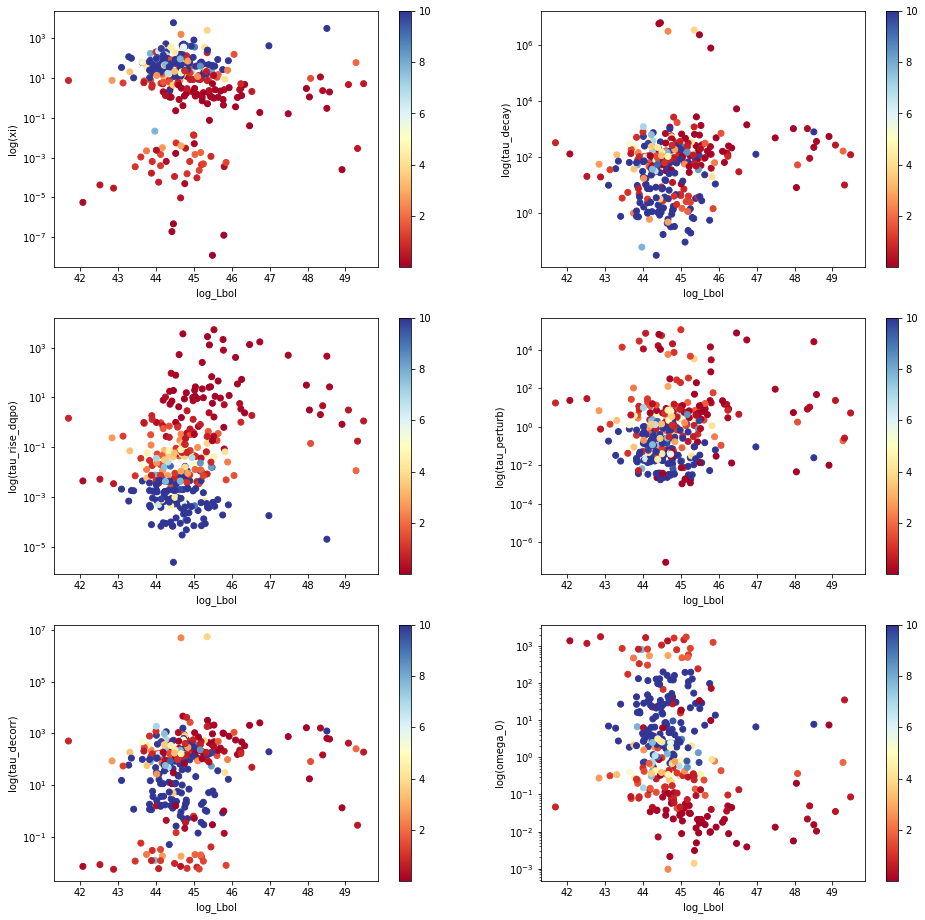

In [7]:
color_plot(dho_fit_data, 'log_Lbol', 'a1', 'timescales_Lbol_a1')
color_plot(dho_fit_data, 'log_Lbol', 'a2', 'timescales_Lbol_a2')
color_plot(dho_fit_data, 'log_Lbol', 'b0', 'timescales_Lbol_b0')
color_plot(dho_fit_data, 'log_Lbol', 'b1', 'timescales_Lbol_b1')

In [8]:
import matplotlib
def log_color_plot(dataframe, x_ax, c_ax, name=''):
    fig, axs = plt.subplots(3, 2, figsize=(16, 16))
    cm = plt.cm.get_cmap('RdYlBu')

    # xi
    row = 0
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='xi', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(xi)')

    # tau_decay
    row = 0
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decay', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decay)')

    # tau_rise_dqpo
    row = 1
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_rise_dqpo', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_rise_dqpo)')

    # tau_perturb
    row = 1
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_perturb', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_perturb)')

    # tau_decorr
    row = 2
    col = 0
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='tau_decorr', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(tau_decorr)')

    # omega_0
    row = 2
    col = 1
    sc = axs[row, col].scatter(data=dataframe, x=x_ax, y='omega_0', c=c_ax, cmap=cm, norm=matplotlib.colors.LogNorm())
    fig.colorbar(sc, ax=axs[row, col])
    axs[row, col].set_yscale('log')
    axs[row, col].set_xlabel(x_ax)
    axs[row, col].set_ylabel('log(omega_0)')
    
    plt.show
    
    if name != '':
        plt.savefig(f'{name}.png')

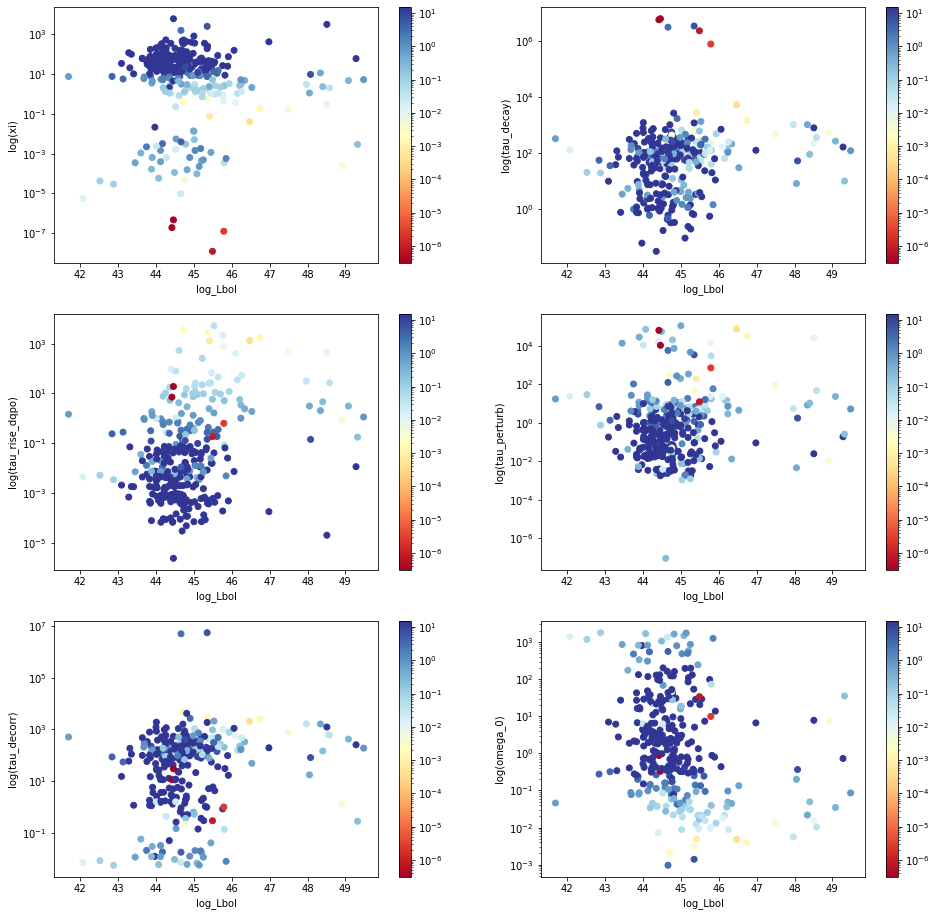

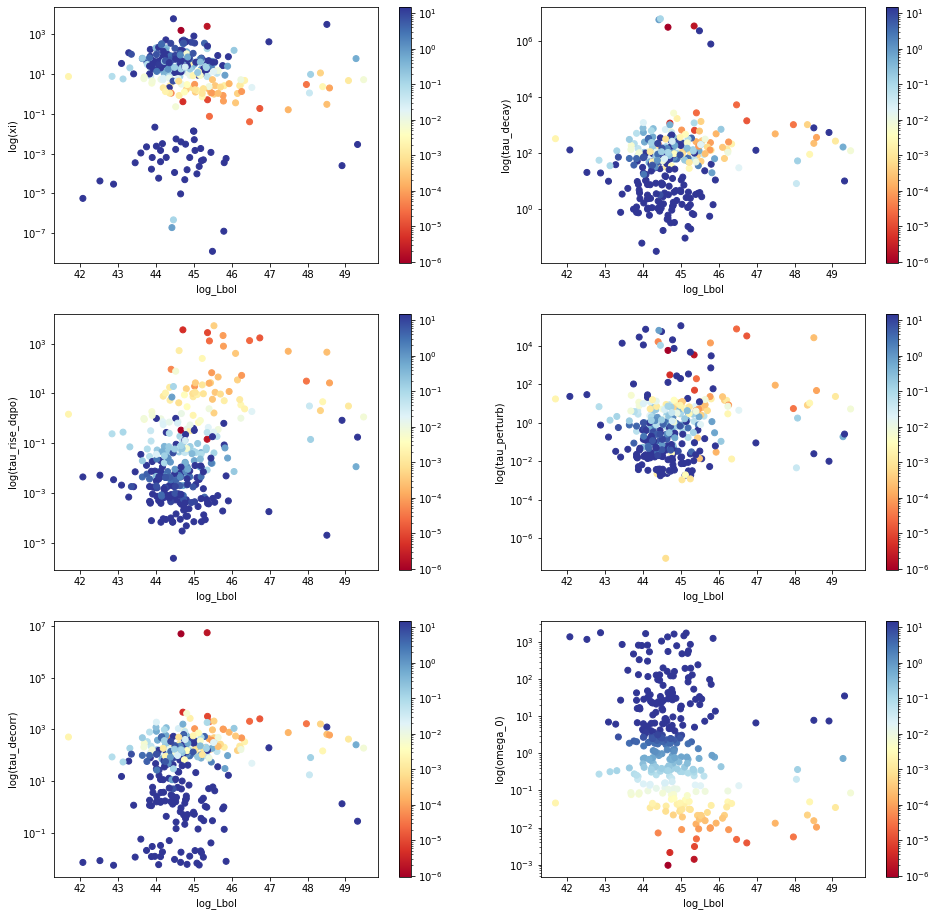

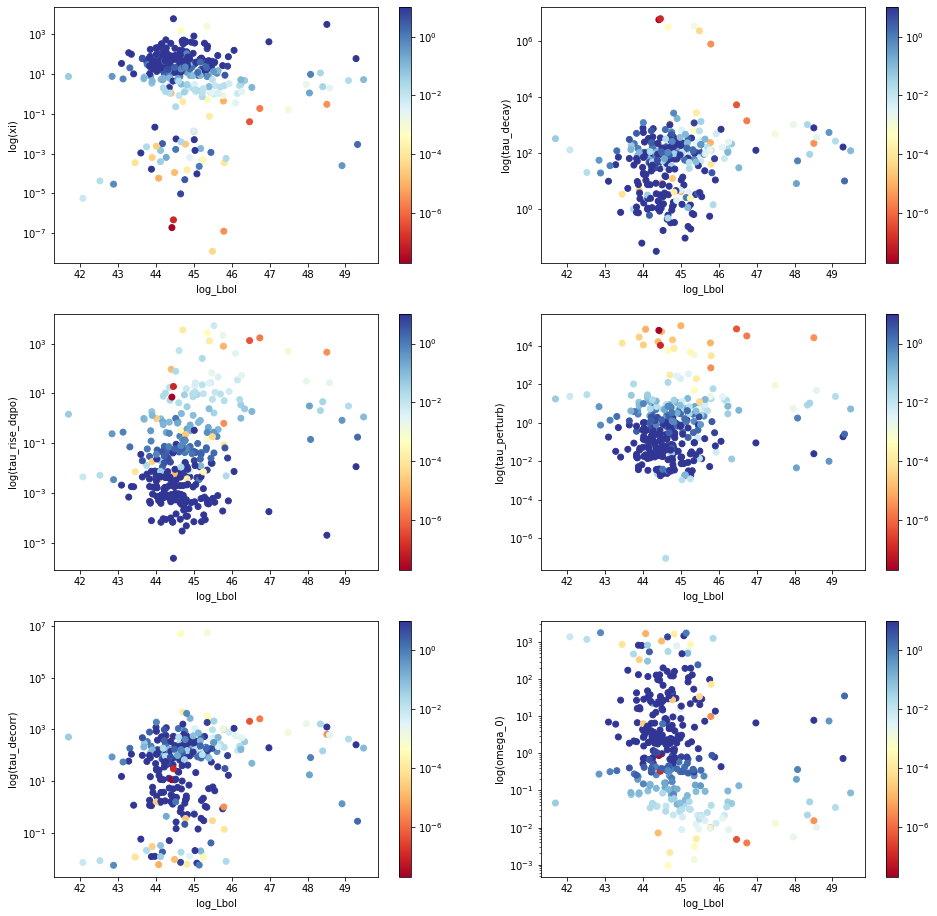

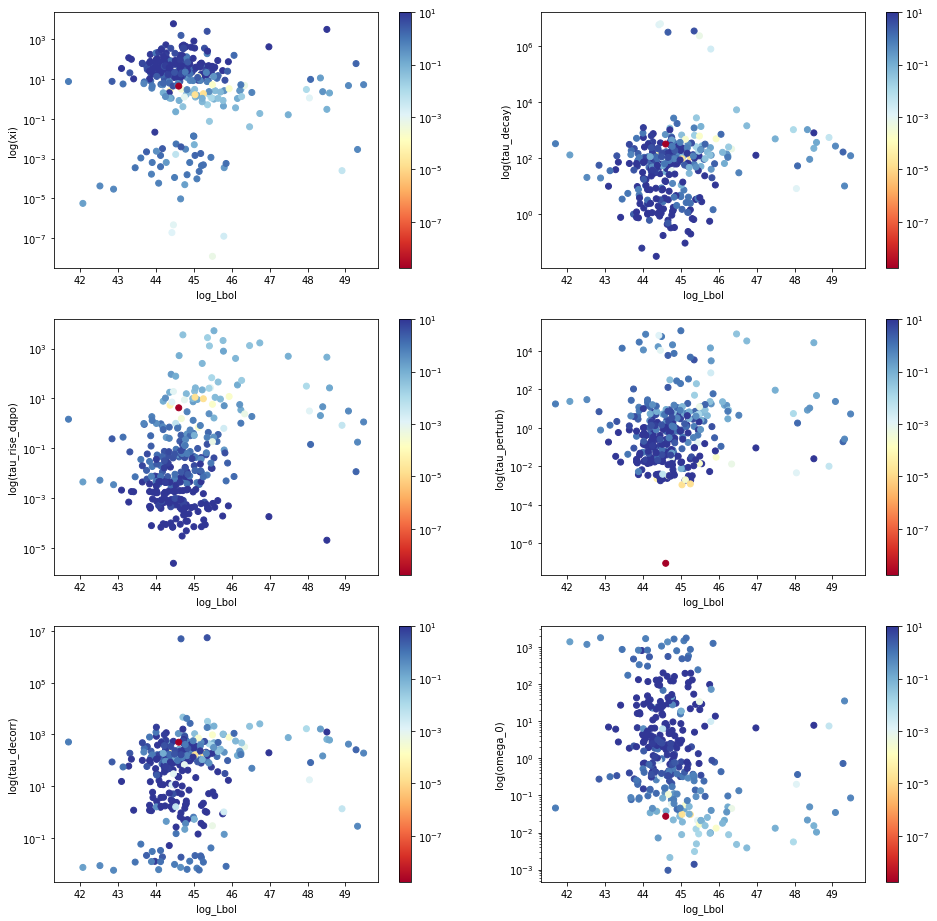

In [9]:
log_color_plot(dho_fit_data, 'log_Lbol', 'a1', 'timescales_Lbol_loga1')
log_color_plot(dho_fit_data, 'log_Lbol', 'a2', 'timescales_Lbol_loga2')
log_color_plot(dho_fit_data, 'log_Lbol', 'b0', 'timescales_Lbol_logb0')
log_color_plot(dho_fit_data, 'log_Lbol', 'b1', 'timescales_Lbol_logb1')